# <span style='background :white' > Overview </span>

### <span style='background :white' >The objective of this analysis is to try understand the factors that lead to ratings scores and to then create a model to predict these scores.</span>
### <span style='background :white' >The sections of this notebook are:</span>

   #### 1. Data Exploration
   #### 2. Data Visualisation and Cleaning
   #### 3. Creating The Model
    



# <span style='background :wheat' > Data Exploration </span>

### <span style='background :oldlace' > Import Libraries to use </span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='mako', font='serif')

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

### <span style='background :oldlace' > Import CSV file </span>

In [2]:
#Import csv file 
df = pd.read_csv(r"C:\Users\cassi\Documents\Github Projects\Python_Goodreads_Predictions\books.csv",  error_bad_lines=False, warn_bad_lines=False)

### <span style='background :oldlace' > Check first ten rows </span>

In [3]:
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


### <span style='background :oldlace' > Check shape of Dataframe </span>

In [4]:
df.shape

(11123, 12)

### <span style='background :oldlace' > Brief overview of data </span>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


### <span style='background :oldlace' > Check for any missing data </span>

In [6]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
#No missing data

bookID - 0%
title - 0%
authors - 0%
average_rating - 0%
isbn - 0%
isbn13 - 0%
language_code - 0%
  num_pages - 0%
ratings_count - 0%
text_reviews_count - 0%
publication_date - 0%
publisher - 0%


### <span style='background :oldlace' > Rename column num_pages to avoid the whitespaces </span>

In [7]:
df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True)

### <span style='background :oldlace' >Change publication date to 'date' type. Drop rows where duplication date is null </span>

In [8]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce') 

df = df[df['publication_date'].notna()]

### <span style='background :oldlace' >Identify if any duplicate rows</span>
### <span style='background :oldlace' >*No duplicates*</span>

In [9]:
duplicateRows = df[df.duplicated()]

duplicateRows

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


### <span style='background :oldlace' >Sort by highest ratings count </span>

In [10]:
df.sort_values(by=['ratings_count'], inplace=False, ascending=False)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,2006-09-06,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,2002-08-15,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,2001-01-30,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,2006-04-01,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...
7399,28467,Sclerotherapy and vein treatment,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,0.00,0071485422,9780071485425,eng,248,0,0,2011-12-30,McGraw-Hill Professional Publishing
9847,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5.00,089096940X,9780890969403,eng,314,0,0,2000-05-01,Texas A&M University Press
8742,33705,Does God Know How to Tie Shoes?,Nancy White Carlstrom/Lori McElrath-Eslick,4.20,0802850898,9780802850898,eng,32,0,0,1997-01-31,William B. Eerdmans Publishing Company
6806,25639,McGraw-Hill's SAT I (McGraw-Hill's SAT I),Christopher Black/Mark Anestis,3.67,007146235X,9780071462358,eng,890,0,0,2005-10-01,McGraw-Hill Companies


# <span style='background :wheat' >Data Visualisation and Cleaning</span>

### <span style='background :oldlace' >Bar graph to compare languages in dataset</span>
### <span style='background :oldlace' >*English language is by far the most and There are 4 values for English (eng, en-US, en-GB, en-CA)* </span>

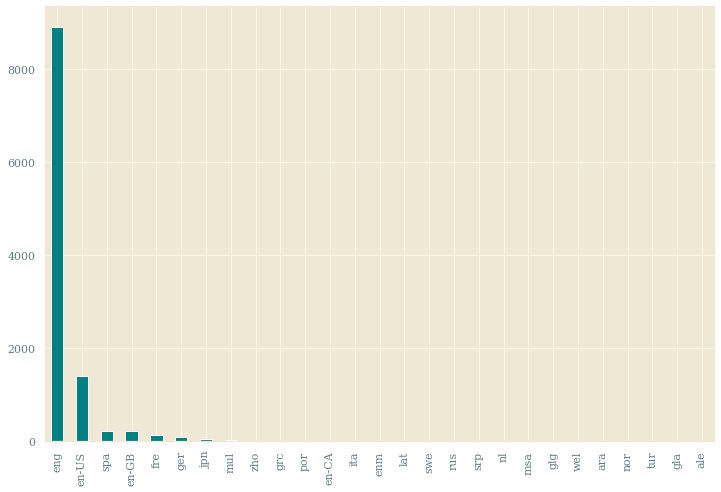

In [11]:
df['language_code'].value_counts().plot(kind='bar', color='teal')

plt.show()

### <span style='background :oldlace' >Change en-US and en-GB to eng in order to have one value for English language</span>

In [12]:
df['language_code'] = df['language_code'].replace(['en-US','en-GB','en-CA'],'eng')

df['language_code'].unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'enm', 'ger', 'jpn', 'ara',
       'nl', 'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg',
       'wel', 'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)

### <span style='background :oldlace'>Donut chart to show comparison of top 5 most frequent languages</span>
### <span style='background :oldlace'>*English is by far the most frequent*</span>

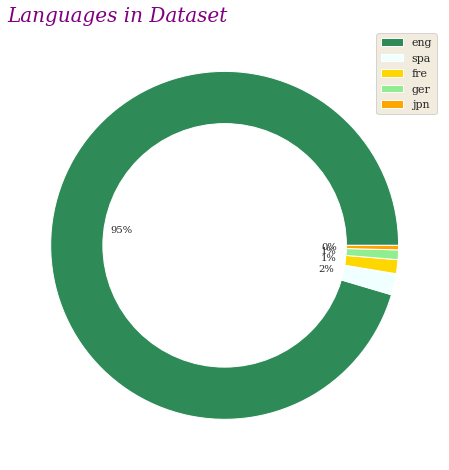

In [13]:
plt.pie(df['language_code'].value_counts().head(5), autopct='%1.0f%%', colors=['seagreen','azure','gold','lightgreen','orange'])

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Languages in Dataset", fontsize=20, fontweight=0, color='purple', loc='left', style='italic')

plt.legend(df['language_code'].value_counts().head(5).index.tolist(), loc="best")

plt.show()

### <span style='background :oldlace'>Brief check at some numeric correlation</span>

In [14]:
df.corr(method = 'pearson')

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.036259,-0.002197,-0.026463,-0.076803,-0.081262
average_rating,-0.036259,1.000000,-0.001967,0.150430,0.038228,0.033669
isbn13,-0.002197,-0.001967,1.000000,-0.009832,0.005495,0.008153
num_pages,-0.026463,0.150430,-0.009832,1.000000,0.034371,0.037021
ratings_count,-0.076803,0.038228,0.005495,0.034371,1.000000,0.865977
text_reviews_count,-0.081262,0.033669,0.008153,0.037021,0.865977,1.000000


### <span style='background :oldlace'>Show previous correlation as heatmap for easier visualisation</span>

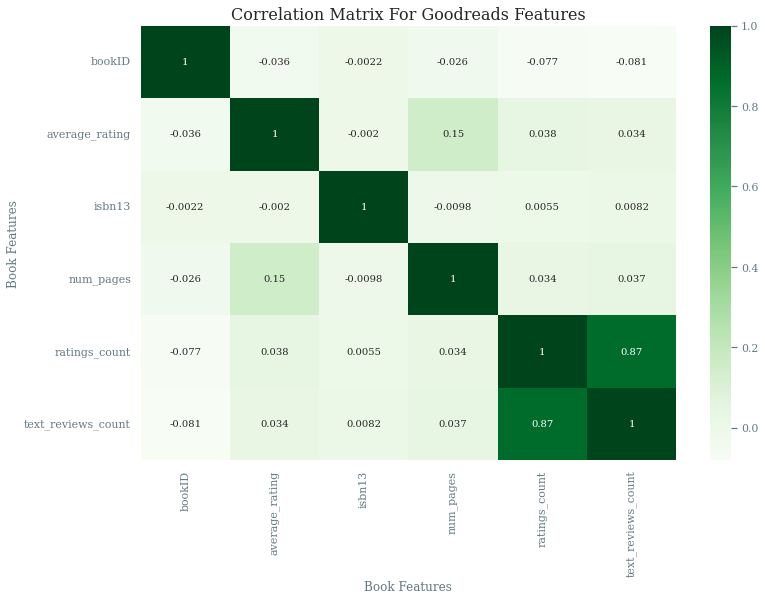

In [15]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, cmap="Greens", annot=True)

plt.title('Correlation Matrix For Goodreads Features')

plt.xlabel('Book Features')
plt.ylabel('Book Features')

plt.show()

### <span style='background :oldlace'>Lineplot to visualize text reviews count against publication data</span>

### <span style='background :oldlace'>*There's a big increase from 1980 onwards. This could just mean older books are not noted on goodreads*</span>

<AxesSubplot:xlabel='publication_date', ylabel='text_reviews_count'>

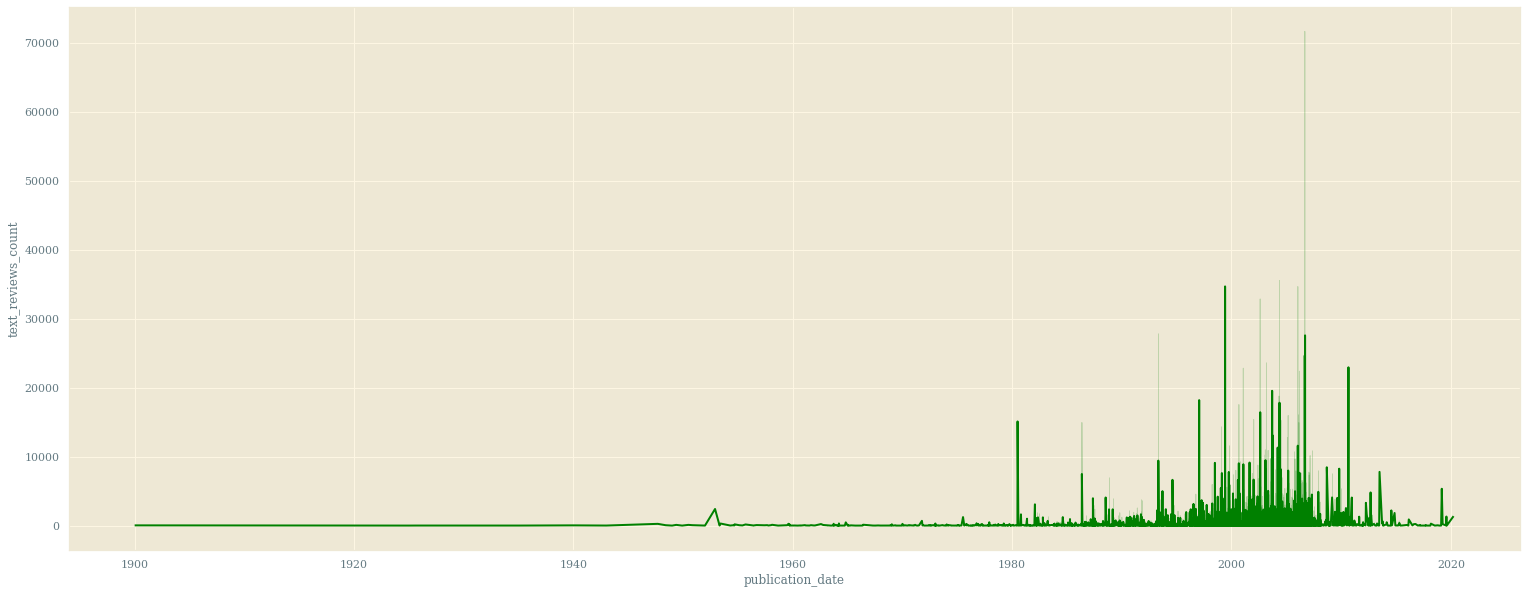

In [16]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="publication_date", y="text_reviews_count", data=df, color='green')

### <span style='background :oldlace'>Visualise four correlated columns as boxplots to check for outliers</span>
### <span style='background :oldlace'>*There seem to be a lot of outliers, let's look further into that*</span>

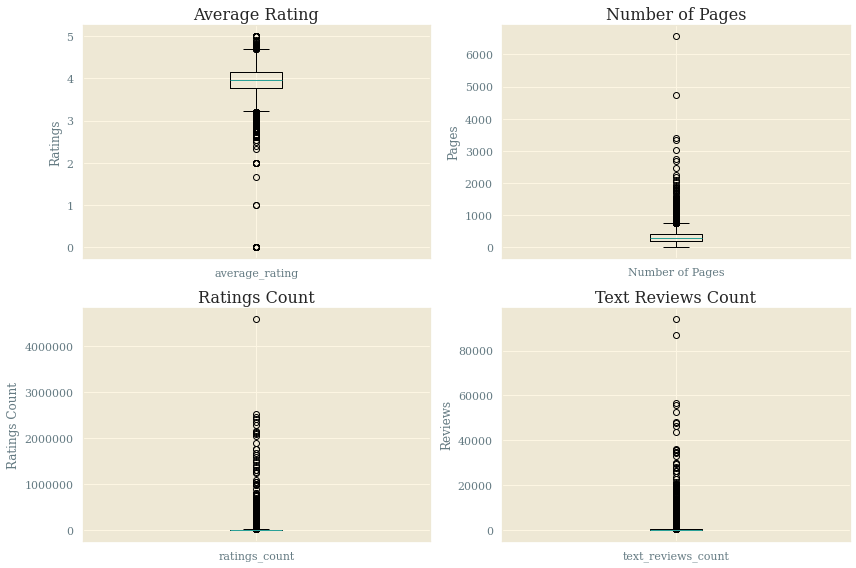

In [17]:
fig = plt.figure()


plt.subplot(2, 2, 1)
plt.boxplot(df['average_rating'])
plt.title("Average Rating")
plt.xlabel('')
plt.xticks([1], ["average_rating"])
plt.ylabel('Ratings')


plt.subplot(2, 2, 2)
plt.boxplot(df['num_pages'])
plt.title("Number of Pages")
plt.xlabel('')
plt.xticks([1], ["Number of Pages"])
plt.ylabel('Pages')


plt.subplot(2, 2, 3)
plt.boxplot(df['ratings_count'])
plt.title("Ratings Count")
plt.xlabel('')
plt.xticks([1], ["ratings_count"])
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Ratings Count')


plt.subplot(2, 2, 4)
plt.boxplot(df['text_reviews_count'])
plt.title("Text Reviews Count")
plt.xlabel('')
plt.xticks([1], ["text_reviews_count"])
plt.ylabel('Reviews')


plt.tight_layout()


plt.show()

### <span style='background :oldlace'>Look closer at ratings_count to check for outliers</span>
### <span style='background :oldlace'>*A lot of outliers from around the 100000 ratings mark*</span>

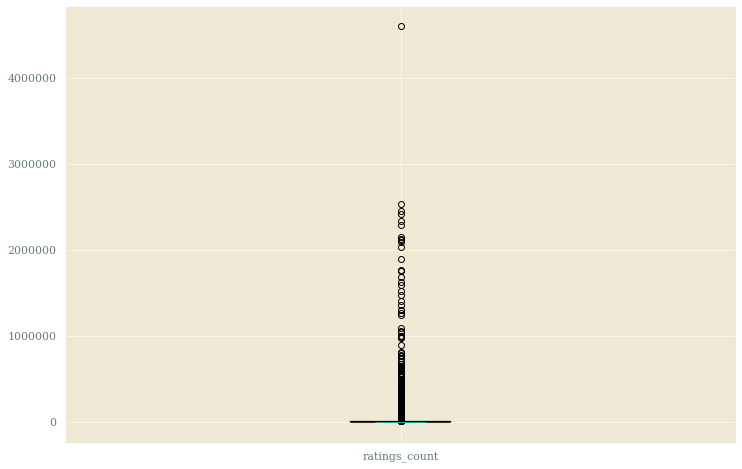

In [18]:
fig, ax = plt.subplots()
ax.boxplot(df['ratings_count'], notch=True, patch_artist=True)
plt.xticks([1], ["ratings_count"])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### <span style='background :oldlace'>Look closer at text_reviews_count to check for outliers</span>
### <span style='background :oldlace'>*A lot of outliers from around the 20000 ratings mark*</span>

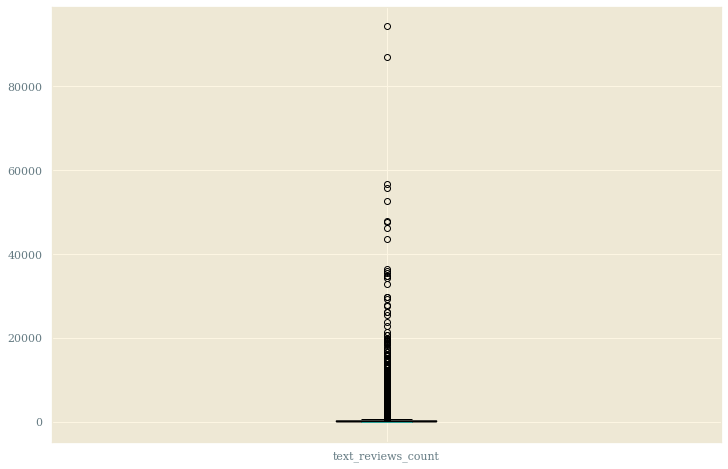

In [19]:
fig, ax = plt.subplots()
ax.boxplot(df['text_reviews_count'], notch=True, patch_artist=True)
plt.xticks([1], ["text_reviews_count"])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### <span style='background :oldlace'>Check average ratings against ratings count</span>
### <span style='background :oldlace'>*Vast majority of ratings came before the 100000 ratings count mark*</span>

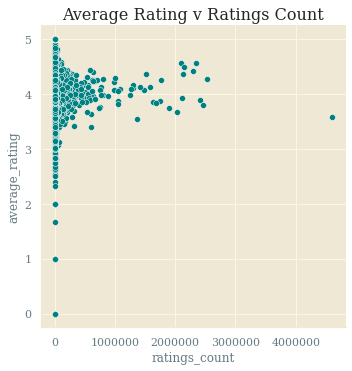

In [20]:
sns.relplot(x="ratings_count", y="average_rating", data=df, color='teal').set(title='Average Rating v Ratings Count')

plt.ticklabel_format(style='plain', axis='x')

### <span style='background :oldlace'>Check average ratings against number of pages</span>
### <span style='background :oldlace'>*Mostly books are below 2000 pages*</span>

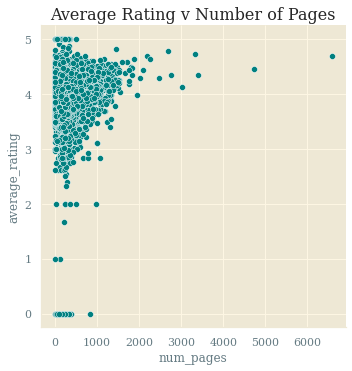

In [21]:
sns.relplot(x="num_pages", y="average_rating", data=df, color='teal').set(title='Average Rating v Number of Pages')

### <span style='background :oldlace'>Check average ratings against number of text reviews</span>
### <span style='background :oldlace'>*There are some big outliers here, most ratings tend to come before the 2000 text reviews mark*</span>

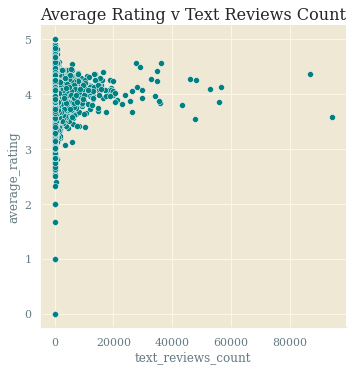

In [22]:
sns.relplot(x="text_reviews_count", y="average_rating", data=df, color='teal').set(title='Title of Plot').set(title='Average Rating v Text Reviews Count')

### <span style='background :oldlace'>Check average ratings against book publication date</span>
### <span style='background :oldlace'>*Some outliers here but most ratings come from 1980 onwards. This would just mean older books are perhaps not on goodreads*</span>

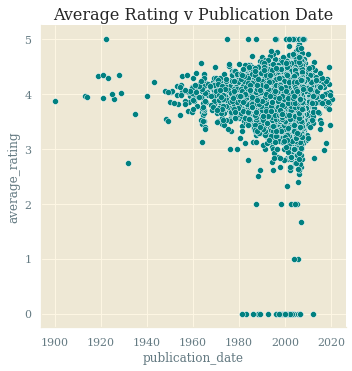

In [23]:
sns.relplot(x="publication_date", y="average_rating", data=df, color='teal').set(title='Average Rating v Publication Date')

### <span style='background :oldlace'>Cutting down Dataframe to get rid of some outliers</span>
### <span style='background :oldlace'>*Drop rows where ratings count is higher than 100000*</span>
### <span style='background :oldlace'>*Drop rows where text reviews count is less than 20000*</span>
### <span style='background :oldlace'>*Drop rows where number of pages is more than 1500*</span>

In [24]:
df = df.drop(df.index[df['ratings_count'] >= 1000000])


df = df.drop(df.index[df['text_reviews_count'] >= 20000])


df = df.drop(df.index[df['num_pages'] >= 1500])

### <span style='background :oldlace'>Check for correlation of number of pages and average rating</span>

<AxesSubplot:xlabel='text_reviews_count', ylabel='average_rating'>

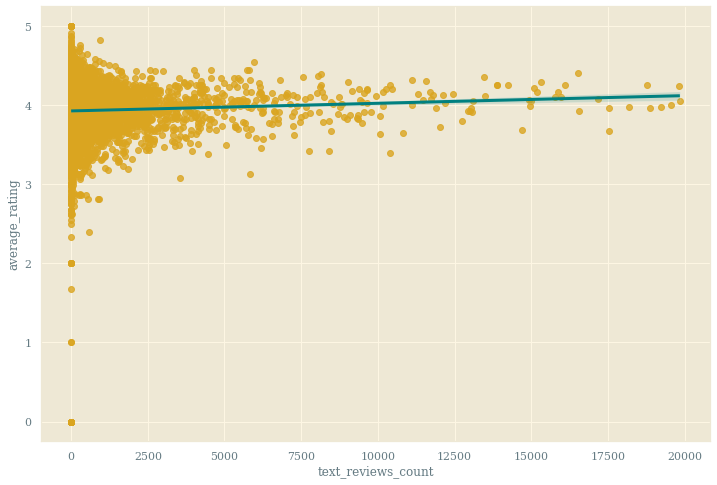

In [25]:
sns.regplot(x="text_reviews_count", y="average_rating", data=df, scatter_kws={"color":"goldenrod"}, line_kws={"color":"teal"})

### <span style='background :oldlace'>Check for correlation of number of ratings and average rating</span>

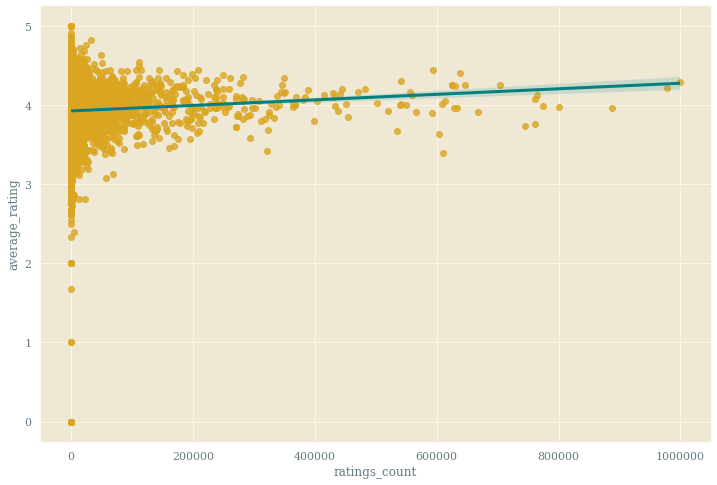

In [26]:
sns.regplot(x="ratings_count", y="average_rating", data=df, scatter_kws={"color":"goldenrod"}, line_kws={"color":"teal"})

plt.ticklabel_format(style='plain', axis='x')

### <span style='background :oldlace'>Change columns to numeric to check further for correlation</span>

In [27]:
df_numerised = df

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'datetime64[ns]'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11052 entries, 2 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11052 non-null  int64  
 1   title               11052 non-null  int16  
 2   authors             11052 non-null  int16  
 3   average_rating      11052 non-null  float64
 4   isbn                11052 non-null  int16  
 5   isbn13              11052 non-null  int64  
 6   language_code       11052 non-null  int8   
 7   num_pages           11052 non-null  int64  
 8   ratings_count       11052 non-null  int64  
 9   text_reviews_count  11052 non-null  int64  
 10  publication_date    11052 non-null  int16  
 11  publisher           11052 non-null  int16  
dtypes: float64(1), int16(5), int64(5), int8(1)
memory usage: 723.1 KB


### <span style='background :oldlace'>View correlation of numerised data as table</span>

In [28]:
df_numerised.corr()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,1.000000,0.008770,-0.002368,-0.034204,0.037017,-0.004853,0.009992,-0.028284,-0.093035,-0.103984,0.027475,-0.035845
title,0.008770,1.000000,0.027354,0.025487,-0.036388,-0.017642,-0.038857,0.010235,-0.005024,-0.009342,-0.015440,0.025521
authors,-0.002368,0.027354,1.000000,0.022553,0.010284,-0.027680,-0.002696,0.004029,0.003456,-0.018104,-0.017702,0.036407
average_rating,-0.034204,0.025487,0.022553,1.000000,0.028643,0.000622,0.028723,0.135291,0.051175,0.038392,-0.031129,0.026948
isbn,0.037017,-0.036388,0.010284,0.028643,1.000000,-0.025605,0.223098,-0.108535,-0.090442,-0.111129,0.107361,0.004783
isbn13,-0.004853,-0.017642,-0.027680,0.000622,-0.025605,1.000000,0.010934,0.004029,0.010942,0.013181,0.004428,0.015795
language_code,0.009992,-0.038857,-0.002696,0.028723,0.223098,0.010934,1.000000,0.017523,-0.035362,-0.050214,0.053460,0.022368
num_pages,-0.028284,0.010235,0.004029,0.135291,-0.108535,0.004029,0.017523,1.000000,0.059787,0.063558,-0.028119,0.007620
ratings_count,-0.093035,-0.005024,0.003456,0.051175,-0.090442,0.010942,-0.035362,0.059787,1.000000,0.860841,0.059586,-0.001169
text_reviews_count,-0.103984,-0.009342,-0.018104,0.038392,-0.111129,0.013181,-0.050214,0.063558,0.860841,1.000000,0.094939,0.006409


### <span style='background :oldlace'>Show correlation of numerised data with heatmap</span>

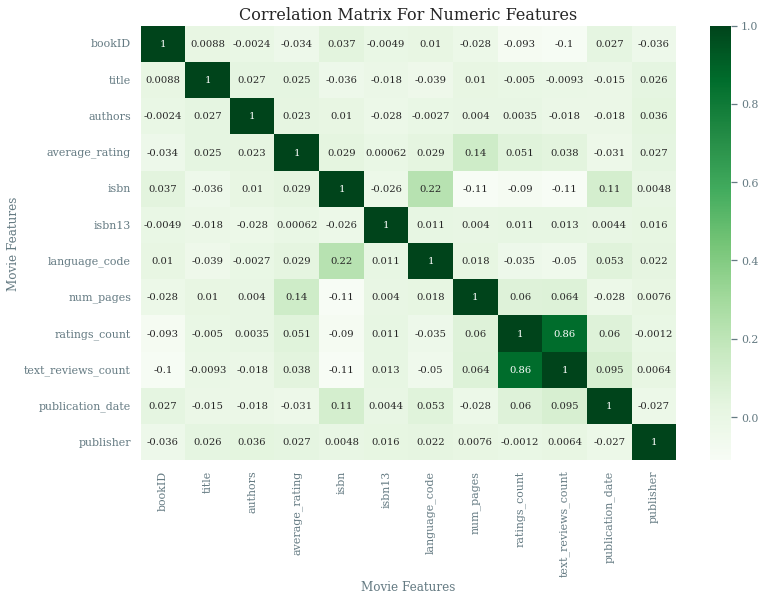

In [29]:
correlation_matrix = df_numerised.corr(method = 'pearson')

sns.heatmap(correlation_matrix, cmap="Greens", annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

# <span style='background :wheat' > Creating The Model </span>

### <span style='background :oldlace'>Firstly encode specific data which will be used in model</span>

In [30]:
lab = preprocessing.LabelEncoder()


df['num_pages'] = lab.fit_transform(df['num_pages'])
df['ratings_count'] = lab.fit_transform(df['ratings_count'])
df['text_reviews_count'] = lab.fit_transform(df['text_reviews_count'])

### <span style='background :oldlace'>Data will be divided into attributes and label</span>
### <span style='background :oldlace'>*Label is the output we want to predict (y)*</span>
### <span style='background :oldlace'>*Attributes are the input used to help predict (x)*</span>

In [31]:
y = df['average_rating']

df = df.drop(['average_rating', 'bookID', 'title', 'authors', 'isbn', 'isbn13', 'publisher', 'publication_date', 'language_code'], axis=1)

### <span style='background :oldlace'>Scatter matrix test to confirm that the chosen data for predictions are correct</span>

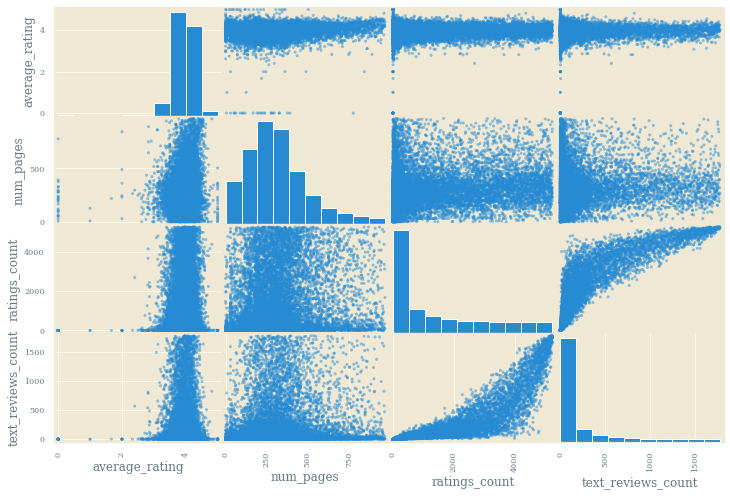

In [32]:
Matrix_test = pd.concat([y, df], axis=1)

scatter_matrix(Matrix_test)
pyplot.show()

### <span style='background :oldlace'>Split the Data into 70% for training and 30% for the test set</span>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=42)

### <span style='background :oldlace'>Have attributes and label fit Linear Regression model</span>

In [34]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

### <span style='background :oldlace'>Predict the score</span>

In [35]:
predictions = lin.predict(X_test)

### <span style='background :oldlace'>View results of test</span>

In [36]:
results = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
results.head(10)

,Actual,Predicted
0,4.00,3.836914
1,4.00,3.874643
2,4.19,3.929432
3,3.87,3.893631
4,3.76,3.893092
5,3.82,3.901718
6,4.04,3.922323
7,4.33,3.984120
8,4.13,3.928742
9,3.52,3.906208


### <span style='background :oldlace'>#View results of test with difference</span>

In [37]:
resultswithdiff = results.copy()
resultswithdiff['Difference'] = results['Actual'] - results['Predicted']
resultswithdiff.head(10)

,Actual,Predicted,Difference
0,4.00,3.836914,0.163086
1,4.00,3.874643,0.125357
2,4.19,3.929432,0.260568
3,3.87,3.893631,-0.023631
4,3.76,3.893092,-0.133092
5,3.82,3.901718,-0.081718
6,4.04,3.922323,0.117677
7,4.33,3.984120,0.345880
8,4.13,3.928742,0.201258
9,3.52,3.906208,-0.386208


### <span style='background :oldlace'>View actual data alongside predictions</span>

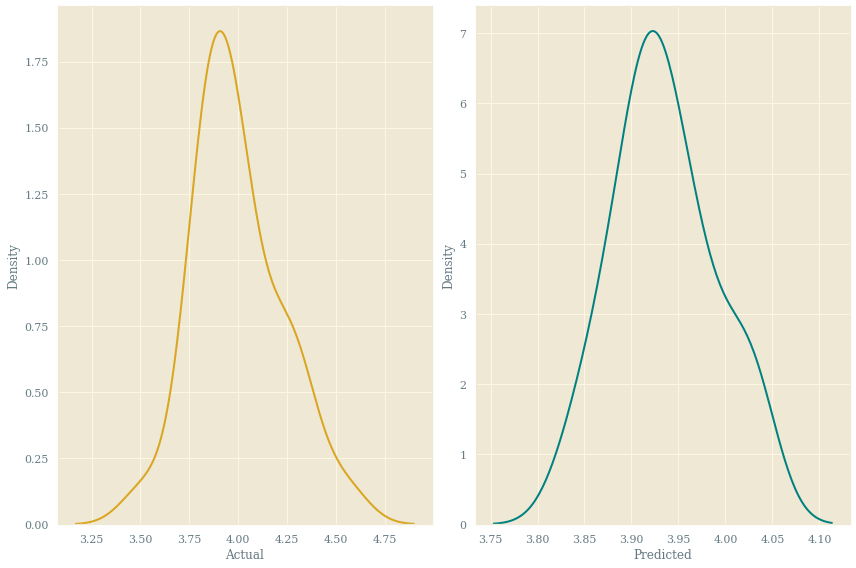

In [38]:
fig, ax =plt.subplots(1,2)
sns.kdeplot(results['Actual'], color='goldenrod', ax=ax[0])
sns.kdeplot(results['Predicted'], color='teal', ax=ax[1])
plt.tight_layout()
fig.show()

### <span style='background :oldlace'>Barchart to view Actual v Predicted</span>

<AxesSubplot:title={'center':'Actual v Predictions'}>

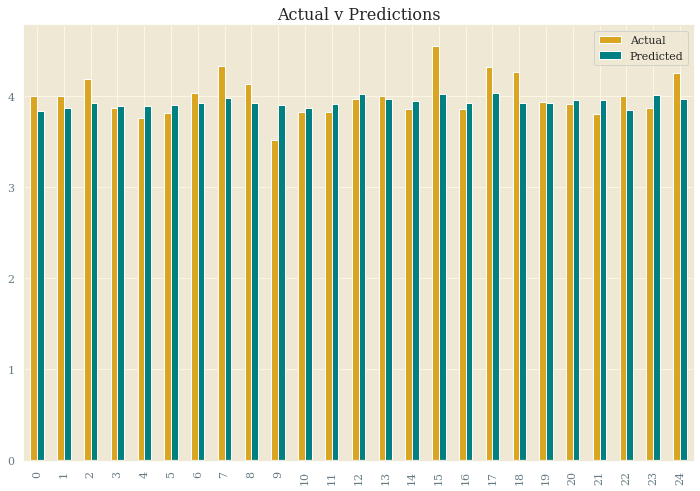

In [39]:
results.plot(kind='bar', color=('goldenrod', 'teal'), title='Actual v Predictions')

### <span style='background :oldlace'>Look at evaluations of the algoritm</span>

In [40]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Absolute Error (MAE):', np.sum(abs(resultswithdiff['Difference']))/resultswithdiff.shape[0])

Mean Absolute Error (MAE): 0.22770663425007817
Mean Squared Error (MSE): 0.10928590049172222
Root Mean Squared Error (RMSE): 0.33058418064348183
Mean Absolute Error (MAE): 0.16692124349929444
